# 4.0-Level 1 annotation

**Inés Sentís**

Date of execution 

In [1]:
Sys.Date()

[1] "2025-01-09"

## Introduction

Level 1 annotation of main cell types

In [2]:
timepoint <- "T1"

## Libraries

In [3]:
suppressMessages(suppressWarnings({
library(Seurat)
library(here)
library(glue)
library(tidyverse)
library(ggplot2)
library(dplyr)
}))

## Parameters

In [4]:
#dr_here(show_reason = TRUE)
source(here("SCGRES_83_84/sc_analysis/misc/paths.R"))
source(here("utils/bin.R"))

"{annot}/{plt_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

"{annot}/{robj_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

set.seed(0)

## Load data

In [5]:
# read object
seurat_obj <- readRDS(here(glue("{clust}/{robj_dir}/3.2-clustering_{timepoint}.rds")))

# markers
rna.markers <- read_csv(here(glue("{clust}/{robj_dir}/3.2-clustering_{timepoint}.csv")))

Rows: 17593 Columns: 7
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): gene
dbl (6): p_val, avg_log2FC, pct.1, pct.2, p_val_adj, cluster

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


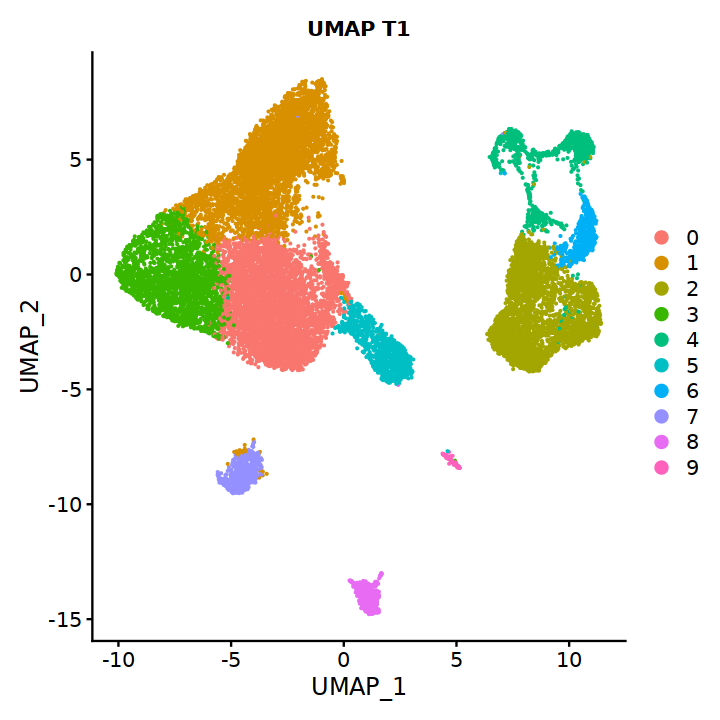

In [6]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  pt.size = 0.1
) + ggtitle(glue('UMAP {timepoint}')) + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

In [7]:
seurat_obj@meta.data <- seurat_obj@meta.data[, -which(names(seurat_obj@meta.data) == "RNA_snn_res.0.2")]
head(seurat_obj@meta.data)

orig.ident   nCount_RNA nFeature_RNA sample_org
T1_1_AAACCTGAGAAGGCCT-1 SCGRES_83_84  8579      3076         OS0007_1  
T1_1_AAACCTGAGATCCCGC-1 SCGRES_83_84  2813      1518         OS0007_1  
T1_1_AAACCTGAGATGTGGC-1 SCGRES_83_84  2333      1252         OS0007_1  
T1_1_AAACCTGAGGGAACGG-1 SCGRES_83_84 14188      3889         OS0007_1  
T1_1_AAACCTGCACAAGACG-1 SCGRES_83_84  7127      2680         OS0007_1  
T1_1_AAACCTGCACCGTTGG-1 SCGRES_83_84  4171      2080         OS0007_1  
                        timepoint replicate sample_id pct_mt   percent.ribo
T1_1_AAACCTGAGAAGGCCT-1 T1        1         T1_1      1.153981  8.777247   
T1_1_AAACCTGAGATCCCGC-1 T1        1         T1_1      3.128333 14.041948   
T1_1_AAACCTGAGATGTGGC-1 T1        1         T1_1      3.771967  8.058294   
T1_1_AAACCTGAGGGAACGG-1 T1        1         T1_1      1.557654 10.572315   
T1_1_AAACCTGCACAAGACG-1 T1        1         T1_1      2.259015 20.148730   
T1_1_AAACCTGCACCGTTGG-1 T1        1         T1_1      2.397507  9.470151   
                        doublet_score doublet_pred S.Score     G2M.Score   
T1_1_AAACCTGAGAAGGCCT-1 0.01767429    FALSE        -0.07996875 -0.043351675
T1_1_AAACCTGAGATCCCGC-1 0.03388889    FALSE        -0.06454767  0.007223489
T1_1_AAACCTGAGATGTGGC-1 0.01492339    FALSE        -0.04395379  0.008541046
T1_1_AAACCTGAGGGAACGG-1 0.02187453    FALSE        -0.01683653 -0.026901698
T1_1_AAACCTGCACAAGACG-1 0.01767429    FALSE         0.05103090  0.006105521
T1_1_AAACCTGCACCGTTGG-1 0.06417328    FALSE         0.01798554 -0.043719719
                        Phase old.ident    seurat_clusters
T1_1_AAACCTGAGAAGGCCT-1 G1    SCGRES_83_84 1              
T1_1_AAACCTGAGATCCCGC-1 G2M   SCGRES_83_84 4              
T1_1_AAACCTGAGATGTGGC-1 G2M   SCGRES_83_84 0              
T1_1_AAACCTGAGGGAACGG-1 G1    SCGRES_83_84 1              
T1_1_AAACCTGCACAAGACG-1 S     SCGRES_83_84 2              
T1_1_AAACCTGCACCGTTGG-1 S     SCGRES_83_84 1

### Check general cell types

Plot specific markers to annotate main cell types

#### T-cells

In [8]:
markers = c("CD3E", "CD3G","CD4","CD8A", "CD8B","ANXA1","GZMK","FOXP3")

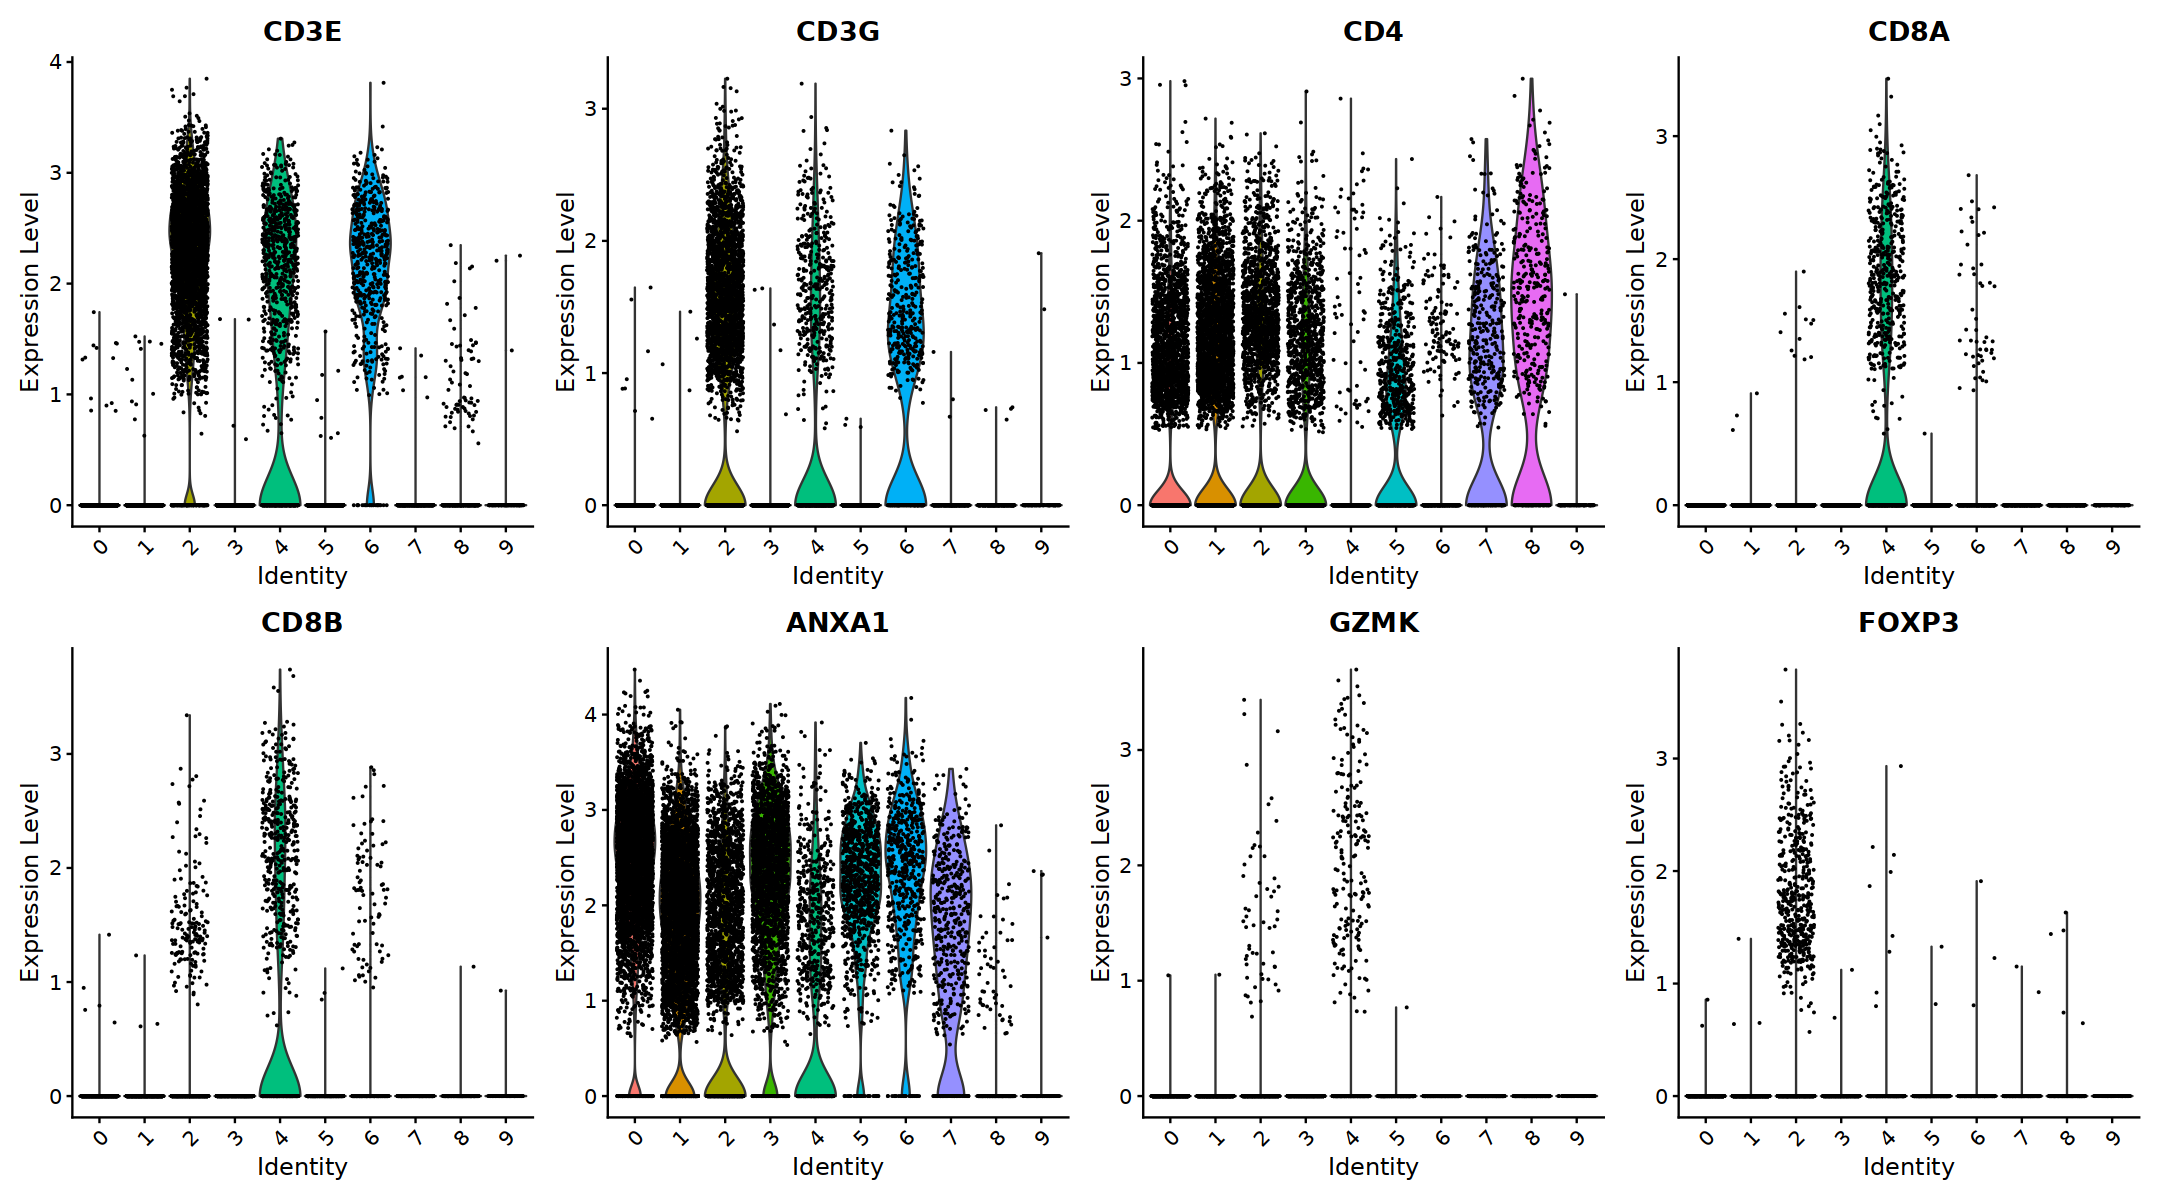

In [9]:
options(repr.plot.width = 18, repr.plot.height = 10, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, 
            features=markers, 
            ncol=4)

#### Natural Killers

In [10]:
markers = c("NCAM1", "FCGR3A", "CX3CR1", "GNLY", "KLRC2", "KLRD1", "KLRC3", "KLRK1", "KLRC1", "GNLY", "NKG7")

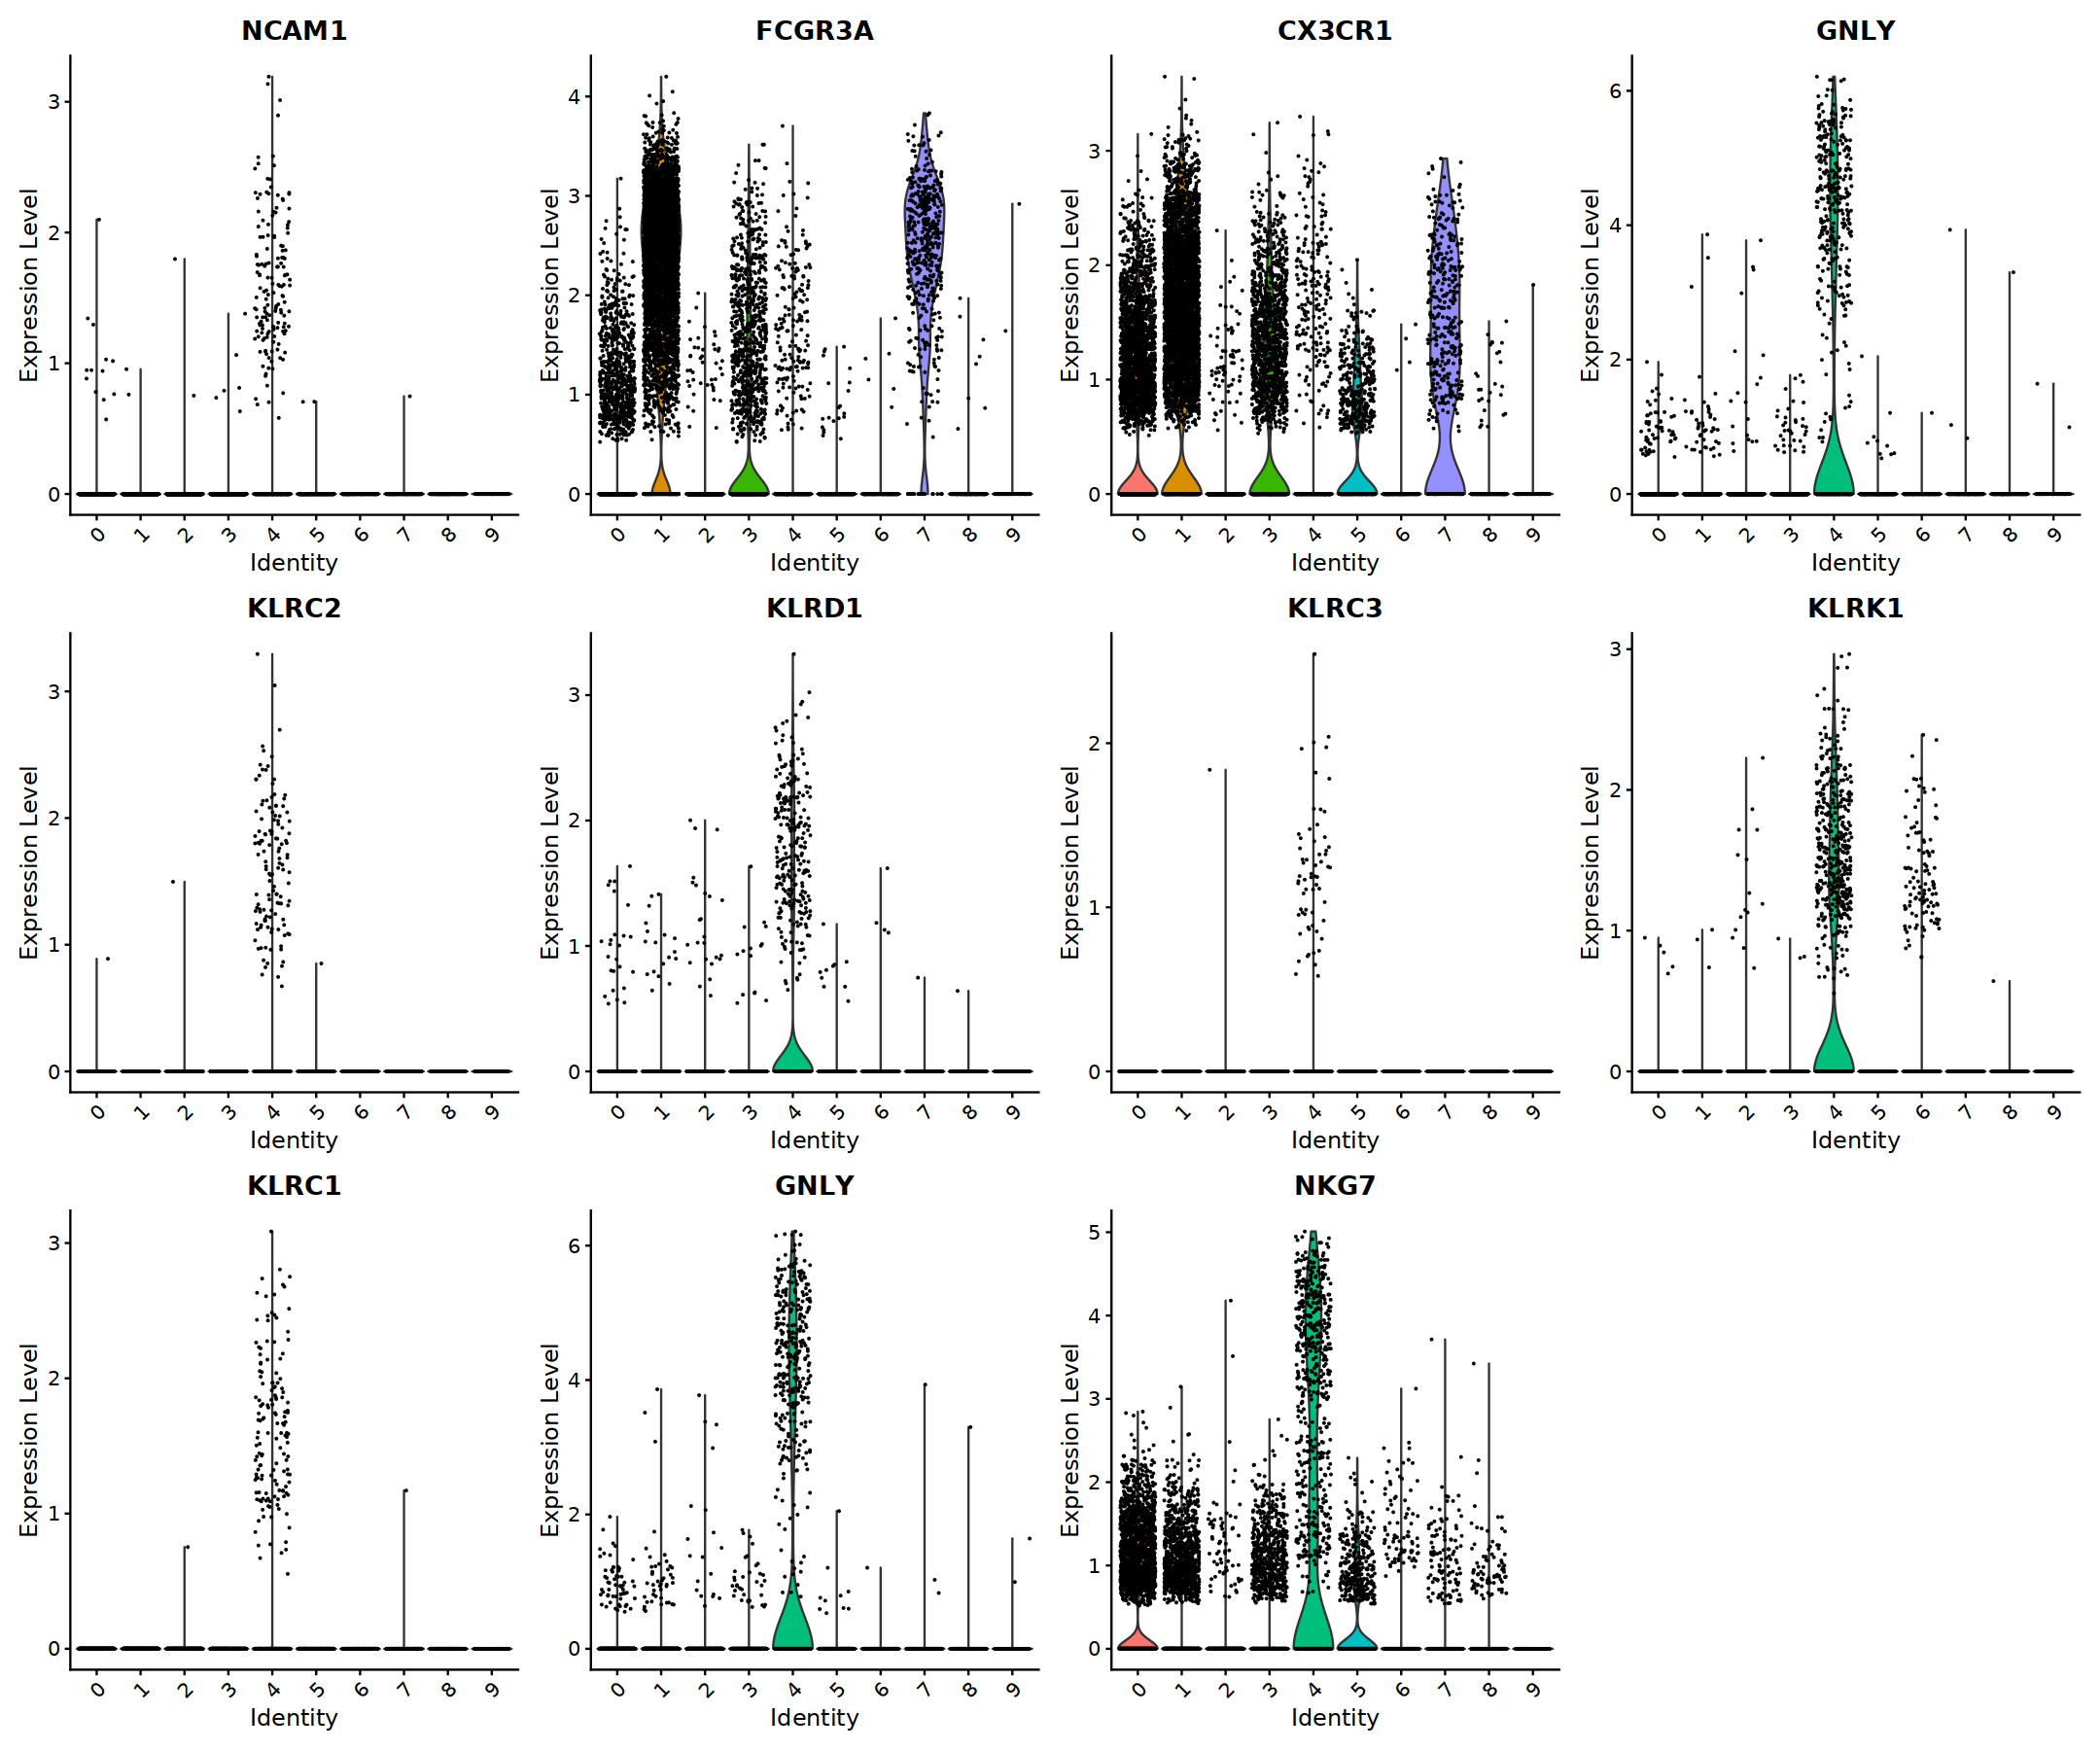

In [11]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, 
            features=markers, 
            ncol=4)

#### B-cells

In [12]:
markers = c("CD19","MS4A1","CCR7", "SELL","ITGAX", "CD79A","CD79B","JCHAIN","IGHA1")

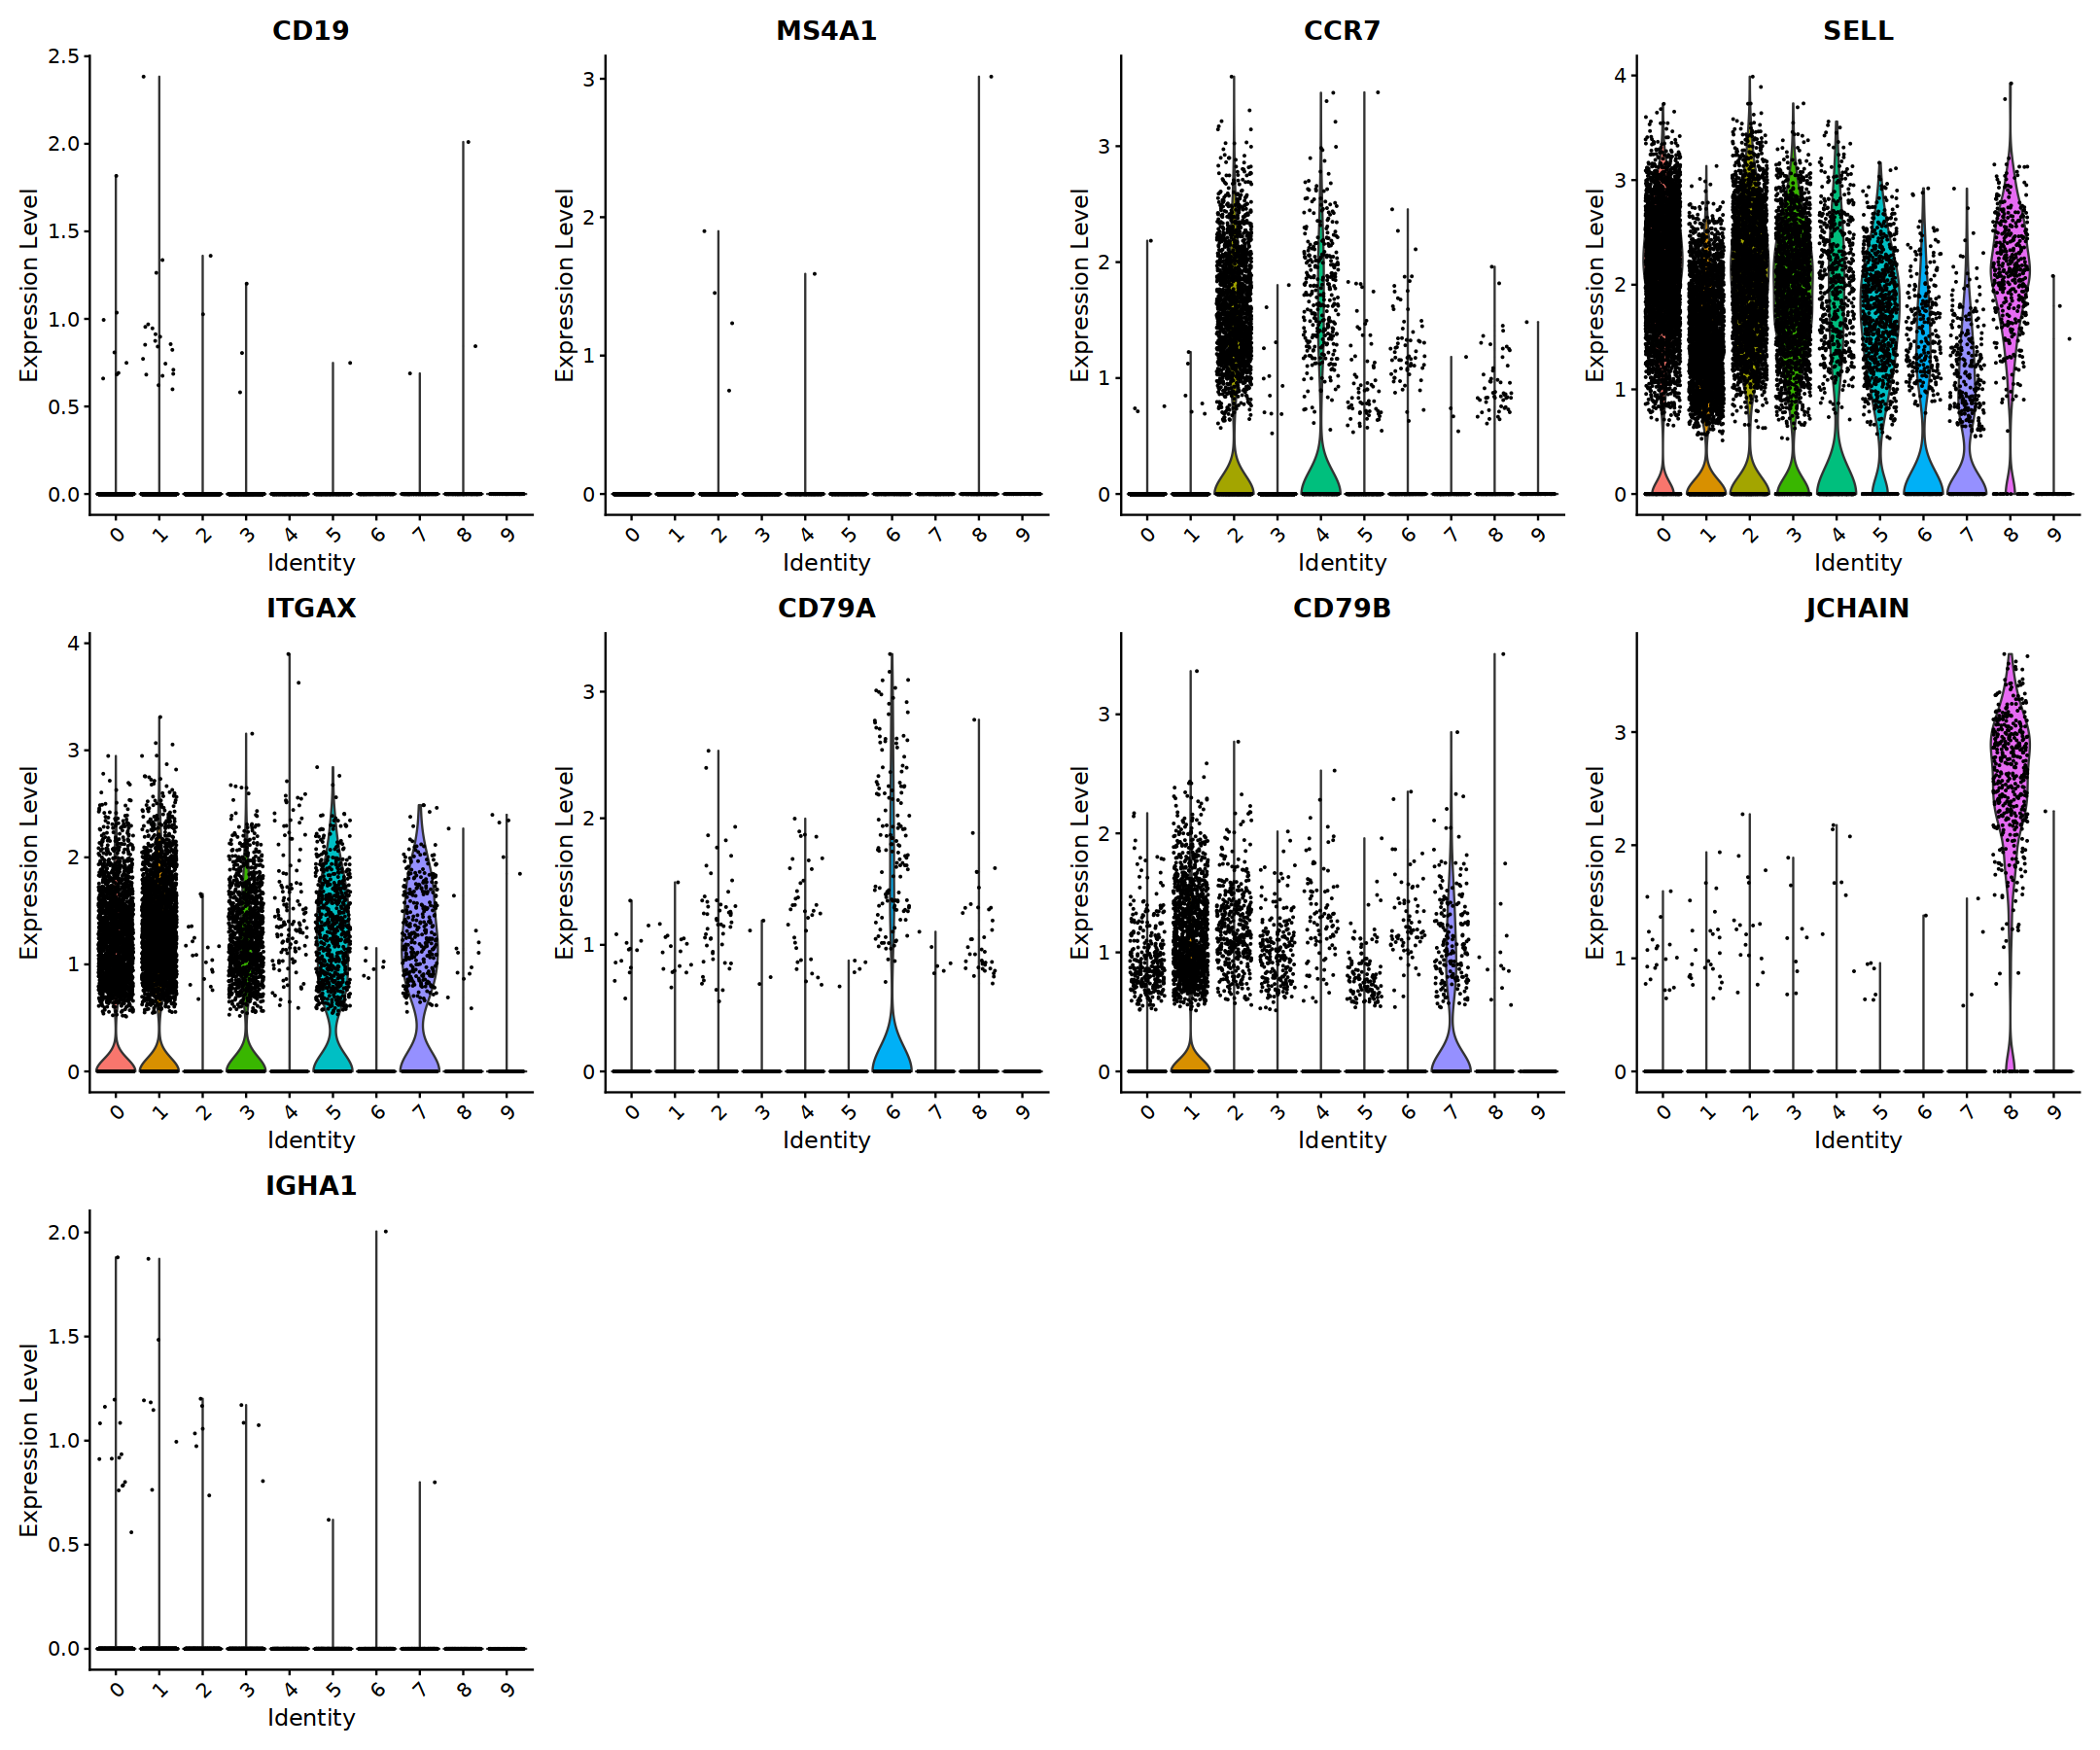

In [13]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, 
            features=markers, 
            ncol=4)

#### Monocytes 

In [14]:
markers = c("CD68","CD14", "S100A8", "S100A9", "LYZ", "VCAN", 
            "FCN1","FCGR3A", "CX3CR1", "HLA-DRB1", "HLA-DRA")

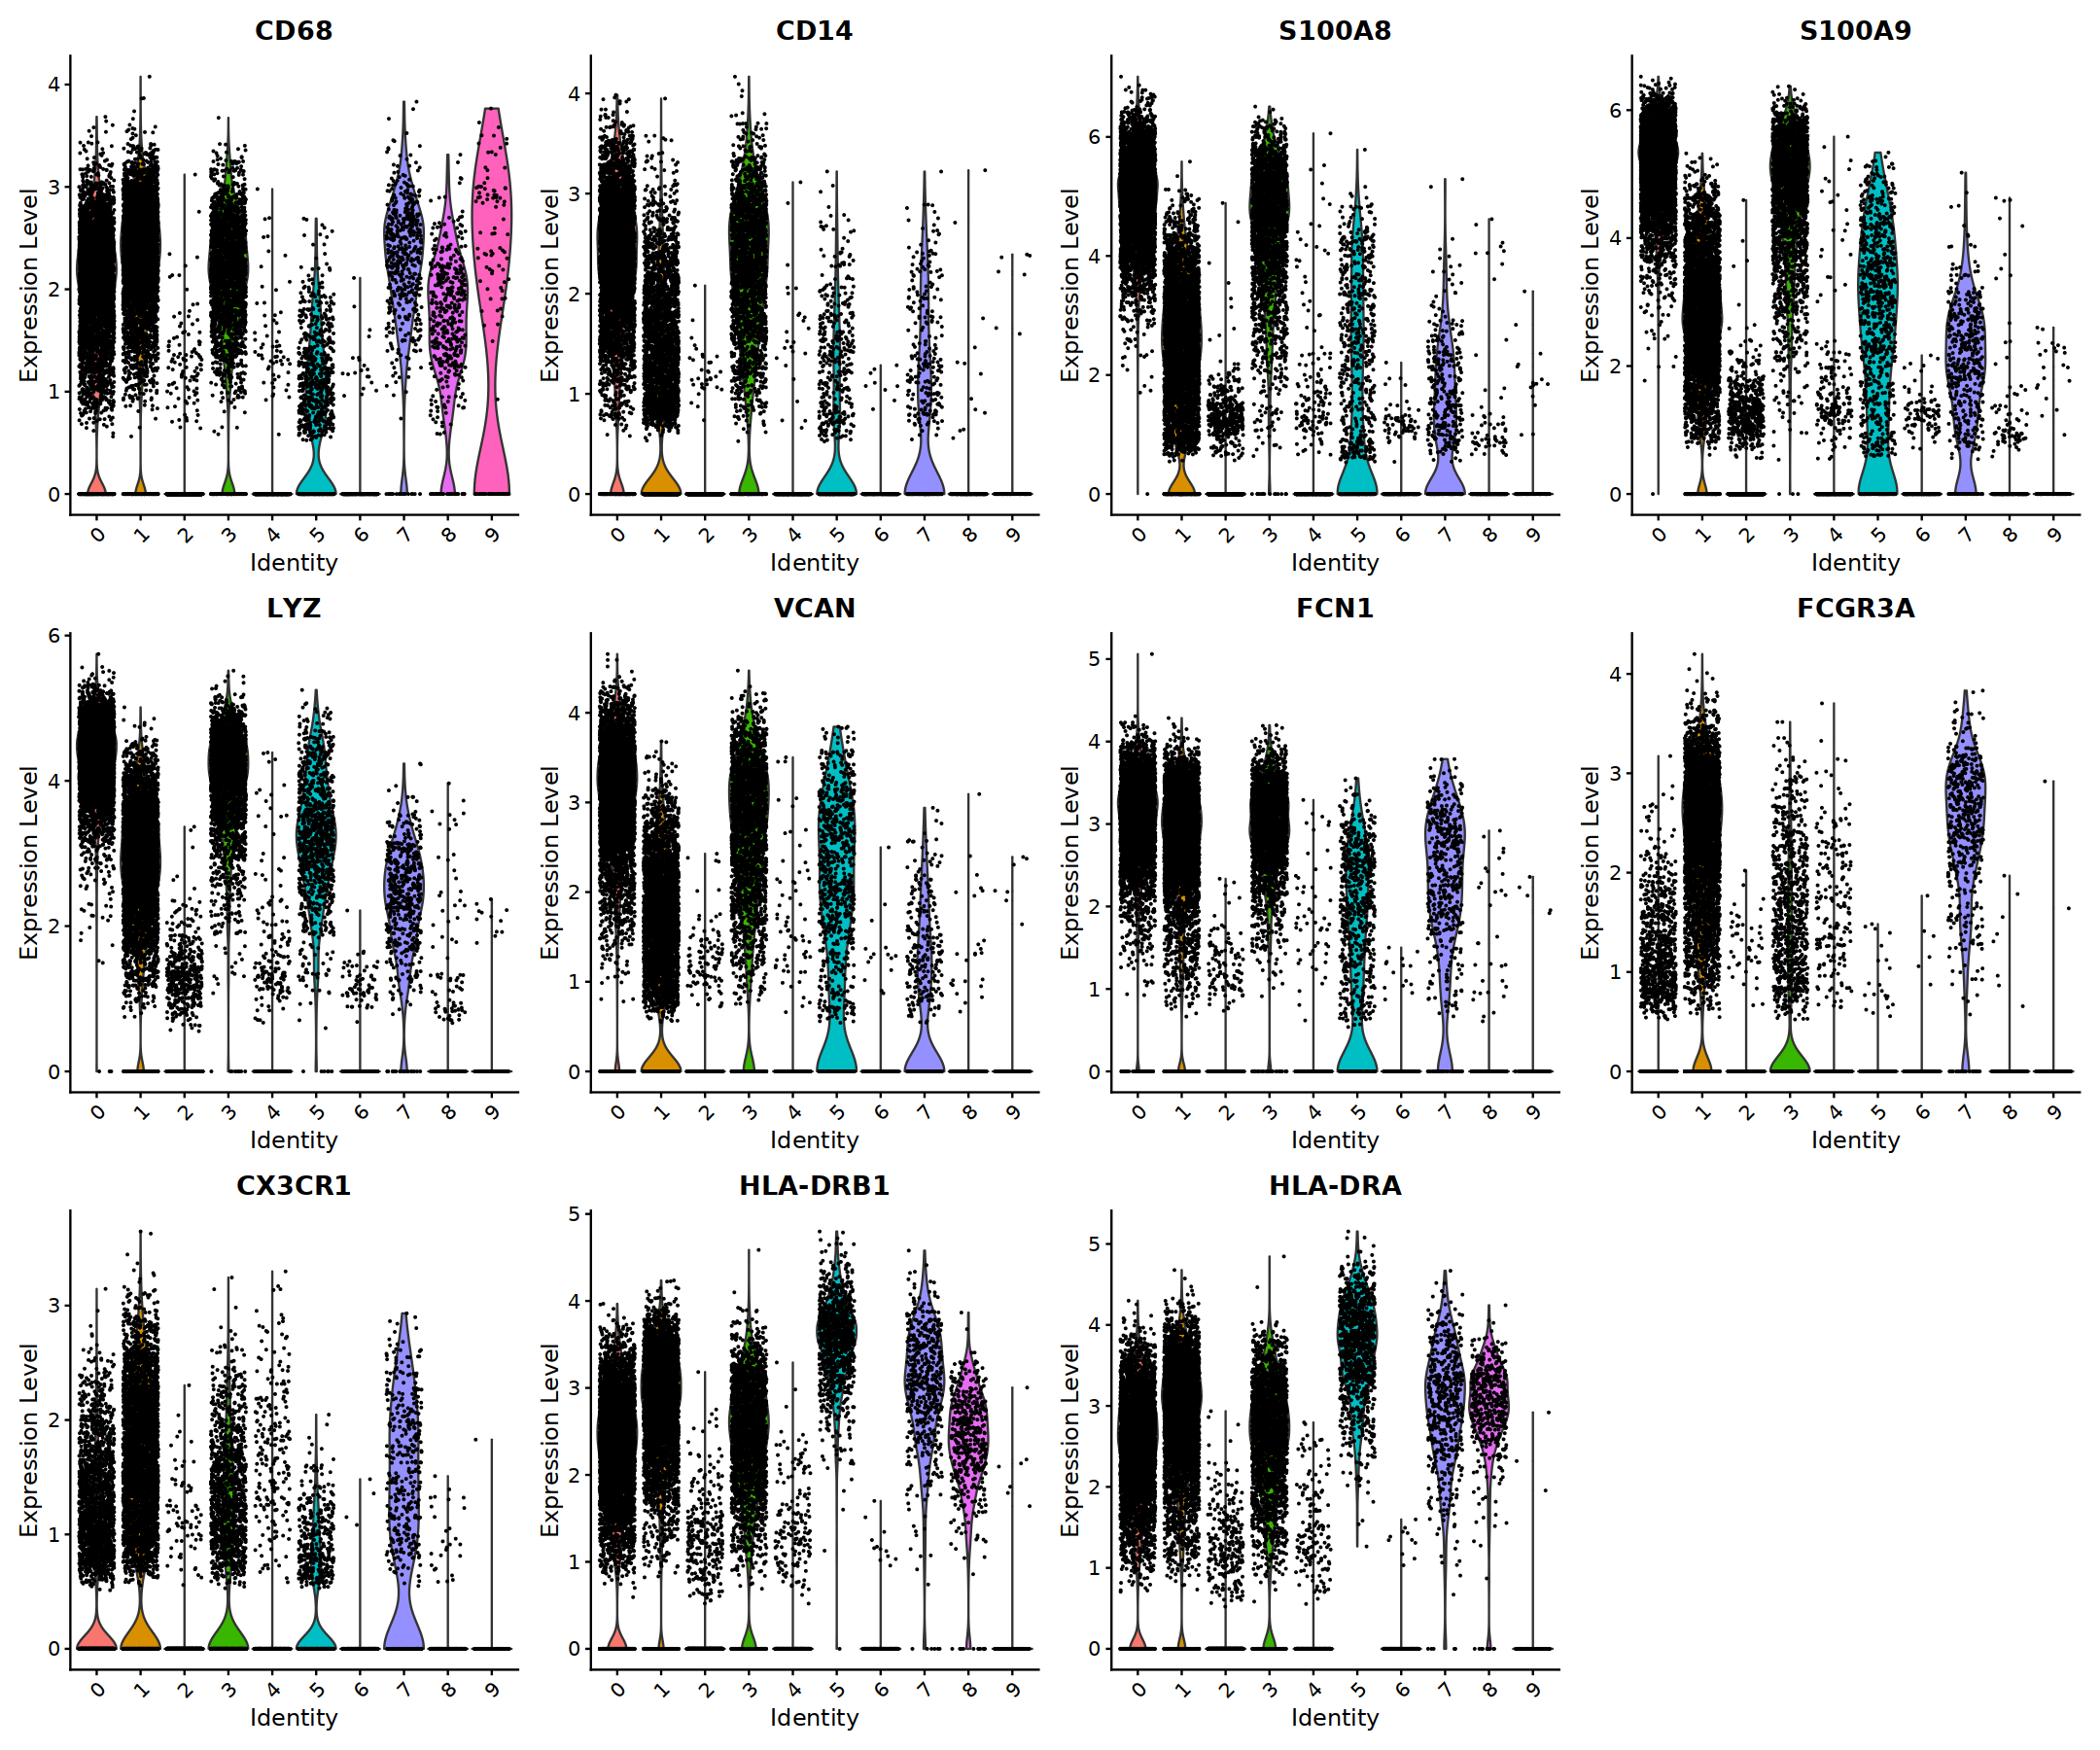

In [15]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, 
            features=markers, 
            ncol=4)

#### Dendritic cells

In [16]:
markers = c("CLEC9A", "XCR1", "IDO1","FCER1A", 
            "CLEC10A","ITGAX","SIGLEC6","IL3RA","JCHAIN")

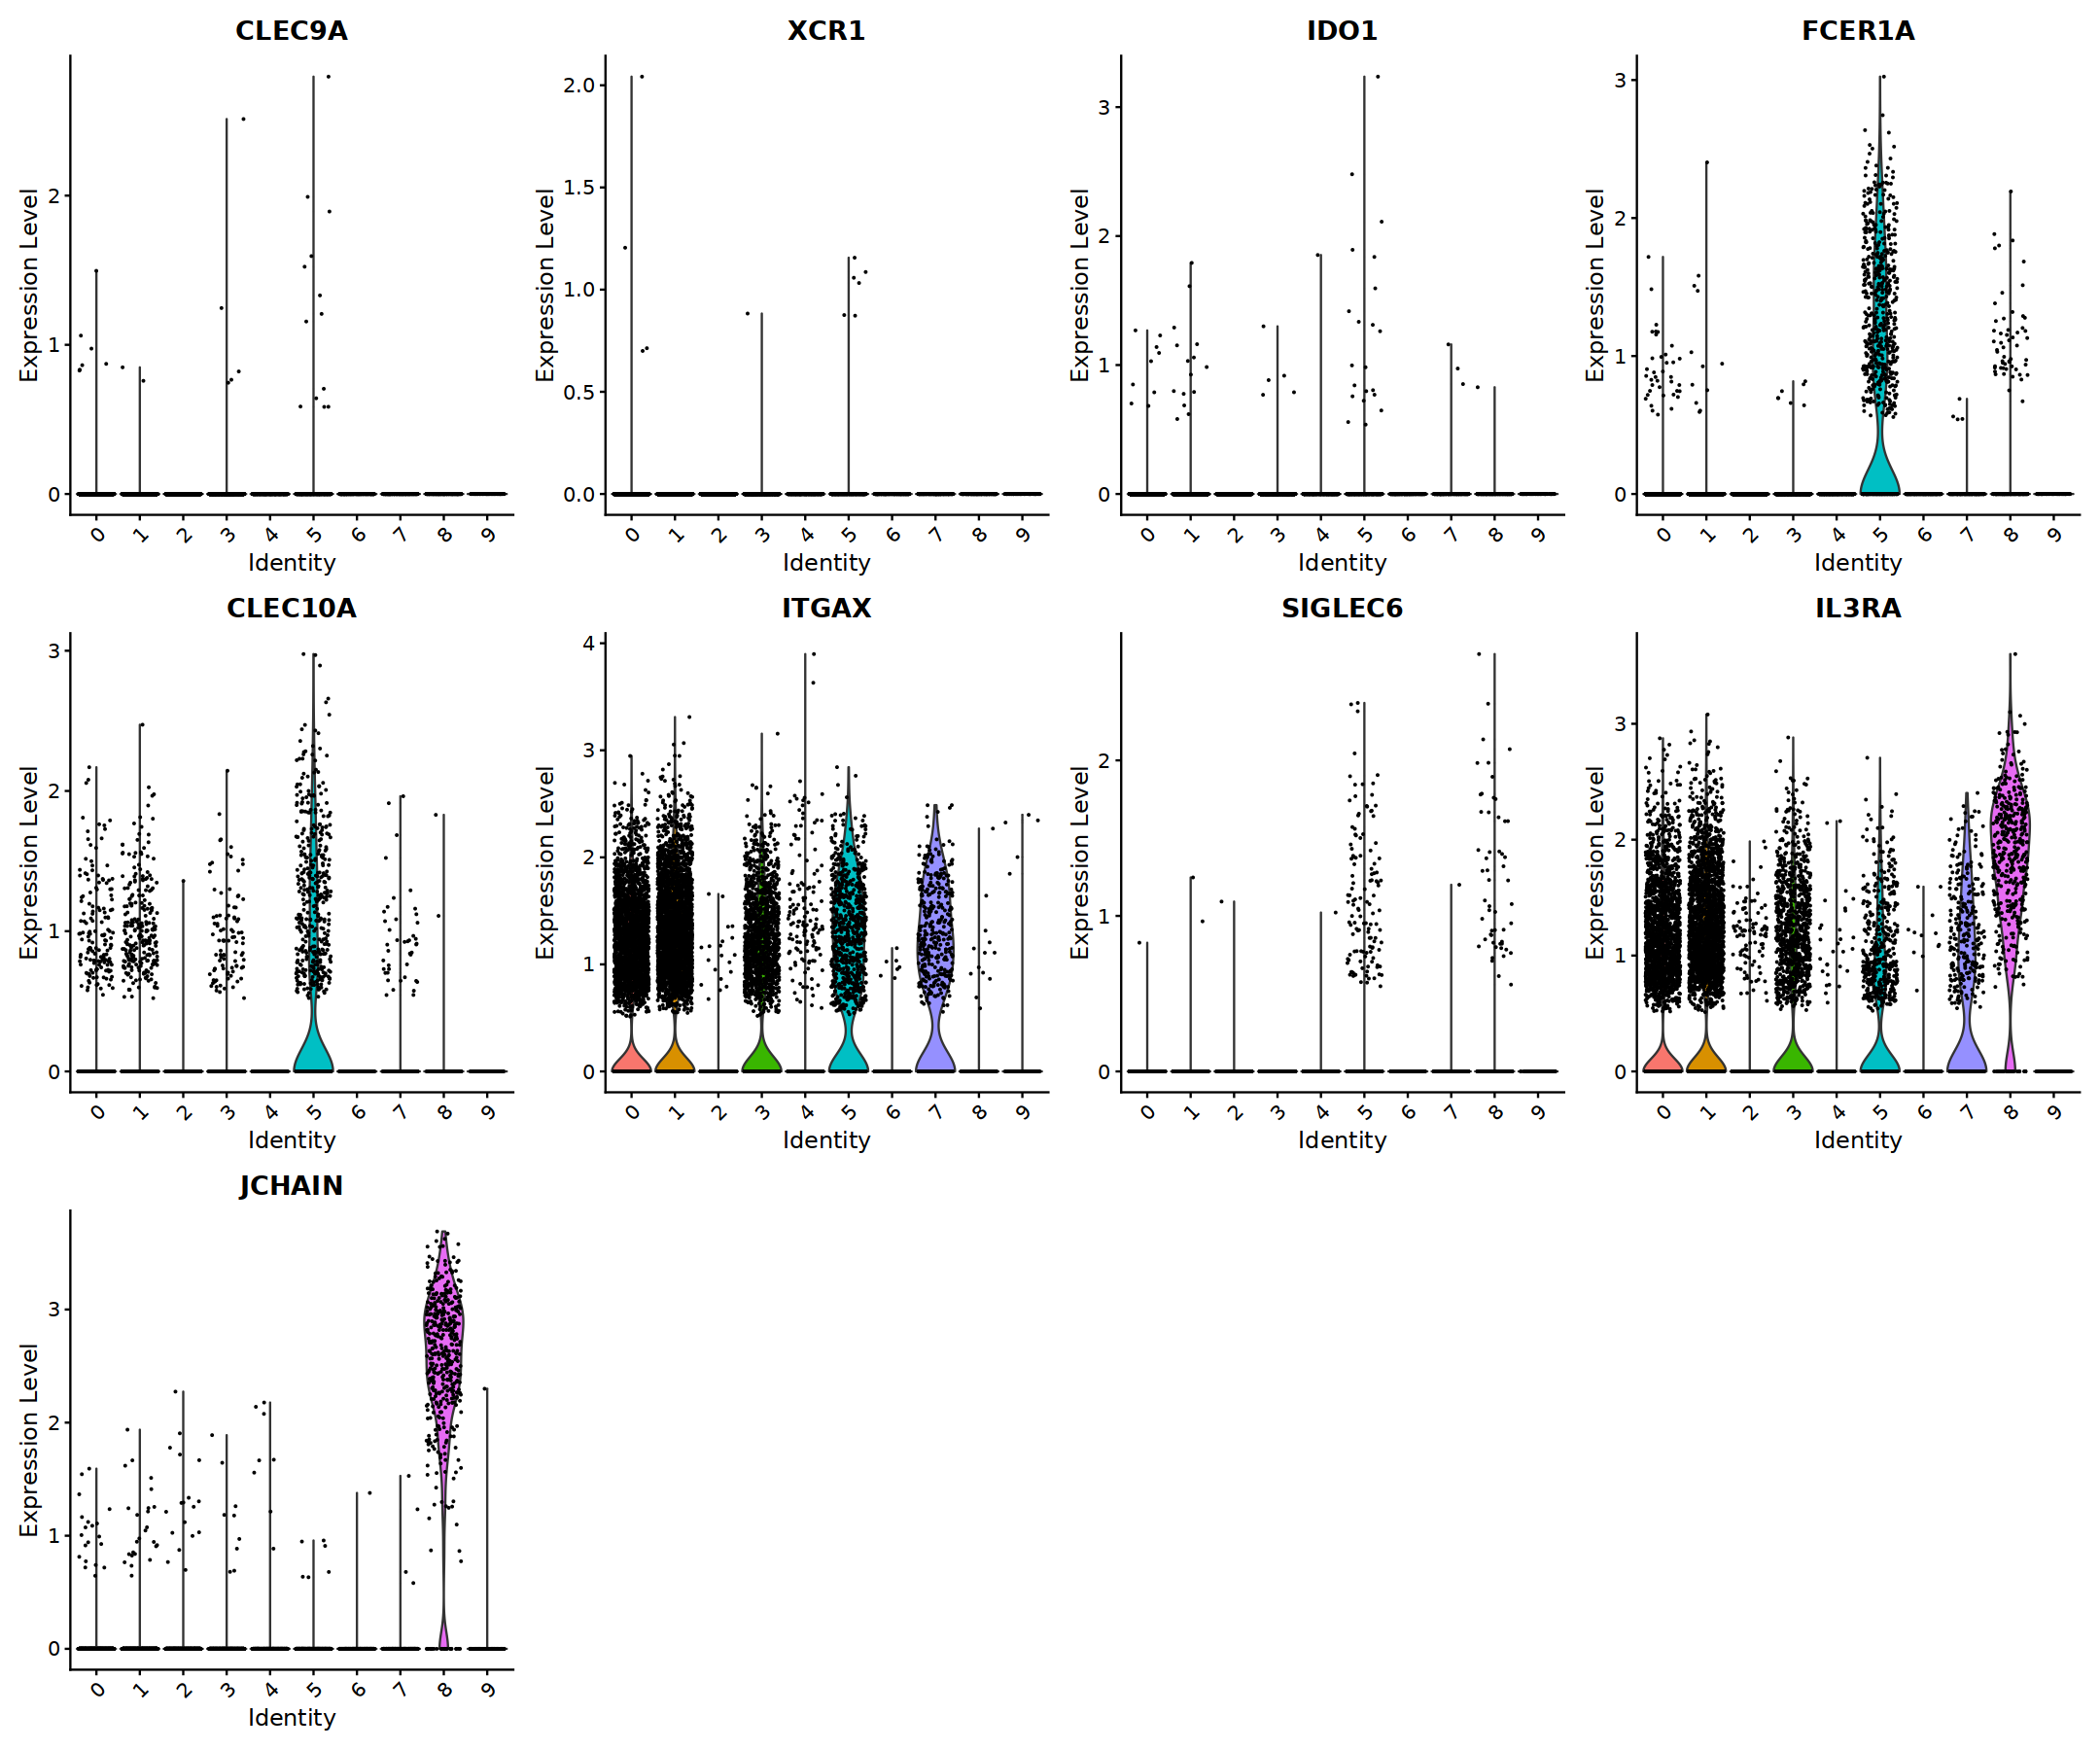

In [17]:
options(repr.plot.width = 18, repr.plot.height = 15, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, 
            features=markers, 
            ncol=4)

In [18]:
seurat_obj <- FindSubCluster(
  seurat_obj,
  cluster =c("4"),
  graph.name = "RNA_snn",
  subcluster.name = "subclustering",
  resolution = 0.1,
  algorithm = 1
)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1048
Number of edges: 34614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9507
Number of communities: 3
Elapsed time: 0 seconds


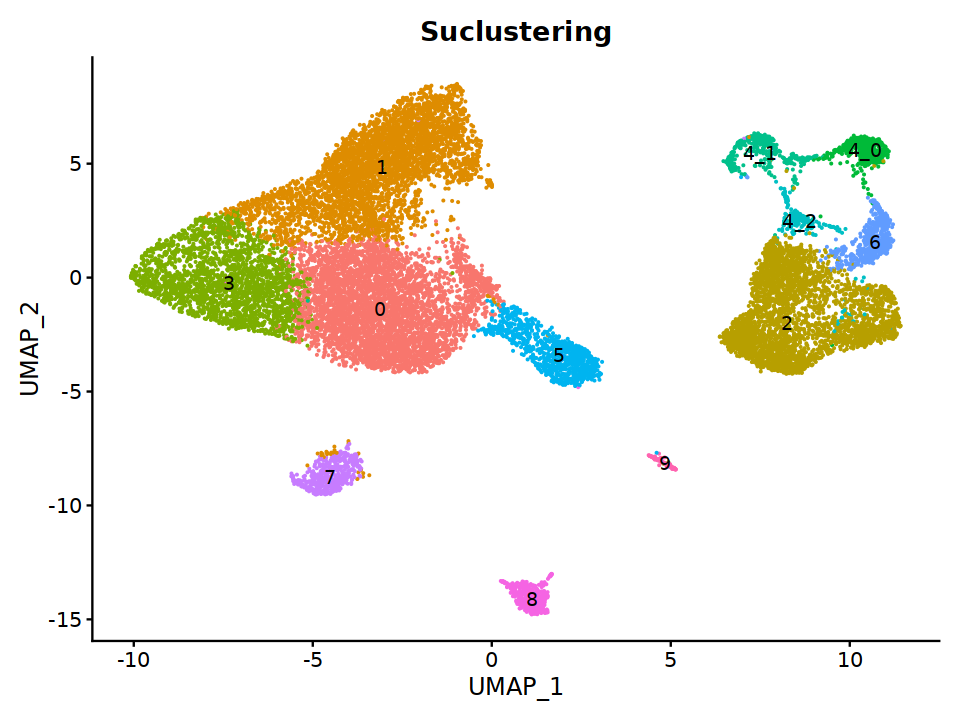

In [19]:
options(repr.plot.width = 8, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(seurat_obj, reduction = "umap", group.by="subclustering", label = T)+ NoLegend() +
  labs(title=glue("Suclustering")) + theme(plot.title = element_text(hjust = 0.5))

In [20]:
seurat_obj <- SetIdent(seurat_obj, value=seurat_obj@meta.data[["subclustering"]])

In [21]:
four_sub <- FindMarkers(seurat_obj, ident.1 = "4_1", ident.2 ='4_0') 

In [22]:
four_sub %>% 
  dplyr::filter(p_val_adj < 0.05) %>% 
  arrange(desc(avg_log2FC))

p_val         avg_log2FC pct.1 pct.2 p_val_adj    
GNLY       6.220902e-110 6.142942   0.802 0.007 1.711059e-105
GZMB       2.896813e-110 4.612222   0.797 0.002 7.967685e-106
NKG7       9.061322e-122 4.103715   0.963 0.365 2.492317e-117
PRF1       9.177194e-128 3.955675   0.941 0.139 2.524187e-123
CCL4        3.747939e-79 3.748413   0.623 0.000  1.030871e-74
LGALS1      6.626606e-88 3.437726   0.758 0.080  1.822648e-83
CST7       5.000078e-117 3.247460   0.878 0.063 1.375272e-112
TYROBP      7.471430e-90 3.104478   0.760 0.085  2.055017e-85
GZMA        1.453376e-96 2.983706   0.822 0.122  3.997510e-92
SPON2       1.539596e-58 2.648131   0.538 0.032  4.234659e-54
GZMH        7.940594e-71 2.446015   0.572 0.000  2.184060e-66
ZEB2        6.650184e-76 2.285313   0.680 0.058  1.829133e-71
CCL5        1.802356e-55 2.110152   0.812 0.316  4.957380e-51
IL2RB       2.424653e-57 2.088331   0.687 0.161  6.669009e-53
PLEK        5.787106e-82 2.078583   0.663 0.015  1.591743e-77
MCTP2       4.905854e-75 2.062988   0.665 0.051  1.349355e-70
TGFBR3      2.261559e-70 2.046654   0.638 0.046  6.220418e-66
KLRD1       1.025660e-69 2.006457   0.619 0.029  2.821077e-65
IGFBP7      4.372804e-56 2.005876   0.474 0.000  1.202740e-51
KLRB1       2.390375e-52 1.951141   0.513 0.036  6.574726e-48
CX3CR1      1.038218e-56 1.950339   0.491 0.007  2.855620e-52
CD247       4.012227e-67 1.896801   0.905 0.594  1.103563e-62
MAP3K8      1.342042e-58 1.893558   0.621 0.088  3.691286e-54
NEAT1       3.761792e-53 1.892474   0.902 0.499  1.034681e-48
FGFBP2      1.644915e-42 1.853142   0.416 0.022  4.524338e-38
FCER1G      1.058049e-41 1.846170   0.628 0.231  2.910162e-37
FCGR3A      2.628118e-49 1.831847   0.440 0.007  7.228639e-45
RAP1GAP2    7.493914e-57 1.766756   0.599 0.075  2.061201e-52
ADGRG1      1.195887e-53 1.756298   0.457 0.000  3.289286e-49
MDM2        5.712925e-40 1.746684   0.765 0.394  1.571340e-35
⋮          ⋮             ⋮          ⋮     ⋮     ⋮            
PCED1B-AS1  3.834308e-51 -1.331902  0.550 0.900 1.054627e-46 
RPS13       8.148312e-94 -1.339272  0.878 0.995 2.241193e-89 
LEPROTL1    5.306885e-48 -1.350393  0.342 0.771 1.459659e-43 
RHOH        2.427017e-49 -1.362014  0.509 0.847 6.675509e-45 
BCL2        7.060129e-45 -1.395447  0.372 0.788 1.941888e-40 
SATB1       3.722260e-44 -1.400257  0.325 0.747 1.023808e-39 
STK17B      5.423846e-60 -1.413934  0.650 0.944 1.491829e-55 
PIM2        7.675030e-49 -1.429046  0.281 0.747 2.111017e-44 
RCAN3       3.392570e-46 -1.446292  0.081 0.530 9.331265e-42 
THEMIS      1.237075e-46 -1.454907  0.147 0.633 3.402575e-42 
PDE3B       1.189963e-52 -1.515242  0.333 0.810 3.272994e-48 
FLT3LG      7.374915e-61 -1.521656  0.342 0.847 2.028470e-56 
TNFSF8      3.013776e-62 -1.562187  0.220 0.788 8.289391e-58 
PRKCQ-AS1   2.224232e-48 -1.564393  0.154 0.618 6.117749e-44 
SARAF       4.506538e-87 -1.574979  0.751 0.993 1.239523e-82 
MAL         1.186284e-49 -1.590155  0.078 0.552 3.262875e-45 
OXNAD1      4.381217e-55 -1.601749  0.193 0.693 1.205054e-50 
PIM1        9.162019e-45 -1.638830  0.230 0.650 2.520013e-40 
TCF7        2.623029e-60 -1.653180  0.220 0.779 7.214642e-56 
JUNB        1.239132e-58 -1.748123  0.743 0.949 3.408232e-54 
CAMK4       6.230539e-71 -1.779221  0.152 0.762 1.713710e-66 
BACH2       2.550679e-72 -1.846956  0.291 0.854 7.015641e-68 
CCR7        8.564826e-62 -1.875711  0.083 0.628 2.355756e-57 
LEF1        4.115356e-76 -1.992507  0.154 0.771 1.131929e-71 
IL7R        8.116607e-80 -2.029510  0.142 0.818 2.232473e-75 
CISH        1.384037e-63 -2.042923  0.056 0.606 3.806794e-59 
LINC02446   1.051919e-64 -2.109804  0.066 0.637 2.893302e-60 
CD8B        1.759896e-98 -2.213648  0.122 0.910 4.840594e-94 
LTB        5.379356e-101 -2.311858  0.462 0.993 1.479592e-96 
NELL2       6.128718e-87 -2.352935  0.037 0.715 1.685704e-82

In [23]:
four_sub <- FindMarkers(seurat_obj, ident.1 = "4_1", ident.2 ='4_2') 

In [24]:
four_sub %>% 
  dplyr::filter(p_val_adj < 0.05) %>% 
  arrange(desc(avg_log2FC))

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
GNLY     6.427311e-69 5.890637   0.802 0.026 1.767832e-64
NKG7     4.292715e-94 5.302260   0.963 0.053 1.180711e-89
GZMB     3.257692e-66 4.175414   0.797 0.044 8.960281e-62
CTSW     2.539442e-82 3.781860   0.897 0.031 6.984735e-78
PRF1     1.897997e-84 3.757057   0.941 0.075 5.220440e-80
CCL4     2.935288e-46 3.571358   0.623 0.022 8.073510e-42
GZMA     2.301144e-71 3.388262   0.822 0.031 6.329296e-67
IFITM1   2.802090e-74 3.240202   0.924 0.228 7.707147e-70
TYROBP   7.947401e-61 3.153687   0.760 0.048 2.185933e-56
LGALS1   7.125398e-54 3.134590   0.758 0.092 1.959841e-49
CST7     4.766415e-74 3.067105   0.878 0.075 1.311003e-69
CCL5     1.021661e-56 3.041950   0.812 0.136 2.810079e-52
HCST     7.239611e-71 2.933427   0.822 0.026 1.991255e-66
IFITM3   1.040772e-56 2.673729   0.817 0.132 2.862644e-52
CD7      3.230089e-63 2.642243   0.844 0.105 8.884360e-59
B2M      9.113526e-72 2.629568   0.985 0.737 2.506675e-67
PFN1     2.274308e-70 2.580763   0.956 0.395 6.255483e-66
IFITM2   2.669127e-64 2.577369   0.885 0.167 7.341433e-60
FCER1G   1.738039e-46 2.571000   0.628 0.022 4.780475e-42
IL2RB    3.832742e-51 2.533588   0.687 0.031 1.054196e-46
FTL      5.762267e-59 2.508652   0.912 0.294 1.584912e-54
SPON2    3.902364e-34 2.464291   0.538 0.044 1.073345e-29
S100A4   8.132376e-46 2.447364   0.792 0.197 2.236810e-41
RPL10    2.027115e-71 2.399386   0.978 0.504 5.575580e-67
RPS15A   3.826051e-72 2.389036   0.980 0.439 1.052355e-67
RPS14    1.466815e-69 2.376938   0.951 0.325 4.034476e-65
TMSB4X   1.485940e-68 2.375786   0.971 0.675 4.087077e-64
RPL41    2.986358e-74 2.366872   0.980 0.588 8.213977e-70
RPS24    2.692295e-71 2.355023   0.958 0.373 7.405157e-67
RPS13    2.856364e-62 2.345453   0.878 0.219 7.856429e-58
⋮        ⋮            ⋮          ⋮     ⋮     ⋮           
BICDL1   3.697655e-23 -1.823329  0.127 0.434 1.017040e-18
PLCL1    7.462088e-18 -1.851711  0.024 0.232 2.052447e-13
CYTH1    1.322416e-48 -1.868822  0.714 0.873 3.637306e-44
ELMO1    1.637476e-23 -1.874684  0.452 0.662 4.503877e-19
PVT1     2.899553e-30 -1.877750  0.641 0.785 7.975221e-26
EML4     2.573865e-29 -1.898378  0.577 0.763 7.079417e-25
AFF3     1.236170e-12 -1.904524  0.088 0.281 3.400085e-08
MLLT3    1.258494e-18 -1.936977  0.213 0.469 3.461487e-14
FOXO1    4.035742e-25 -1.941046  0.213 0.531 1.110031e-20
HIVEP2   7.002923e-25 -1.949911  0.222 0.531 1.926154e-20
ADAM19   1.112124e-24 -1.958207  0.037 0.320 3.058897e-20
FOXP1    5.242017e-22 -1.971512  0.472 0.658 1.441817e-17
ARHGAP15 1.256538e-49 -1.990815  0.765 0.921 3.456107e-45
LEF1     2.185631e-27 -2.008846  0.154 0.500 6.011578e-23
MGAT5    1.022152e-21 -2.015886  0.181 0.469 2.811430e-17
ABCC1    2.504554e-21 -2.035512  0.208 0.487 6.888776e-17
ATXN1    1.109288e-29 -2.048852  0.345 0.658 3.051096e-25
CAMK4    6.146581e-22 -2.090932  0.152 0.452 1.690617e-17
PAG1     2.237919e-31 -2.212751  0.240 0.601 6.155396e-27
LDLRAD4  2.197251e-24 -2.254091  0.115 0.430 6.043540e-20
SERINC5  5.479932e-36 -2.306639  0.122 0.531 1.507255e-31
BCL2     5.896143e-18 -2.347171  0.372 0.575 1.621734e-13
MSI2     5.673399e-33 -2.347993  0.242 0.614 1.560468e-28
ICOS     1.725768e-27 -2.354453  0.120 0.461 4.746725e-23
FAM13A   2.554773e-15 -2.408669  0.100 0.325 7.026903e-11
BCL11B   4.518171e-49 -2.489834  0.267 0.737 1.242723e-44
CDC14A   2.253408e-39 -2.496454  0.252 0.662 6.197998e-35
INPP4B   7.328332e-39 -2.544967  0.137 0.570 2.015658e-34
TSHZ2    1.039778e-28 -2.563109  0.017 0.316 2.859910e-24
ANK3     8.106507e-33 -2.604891  0.078 0.456 2.229695e-28

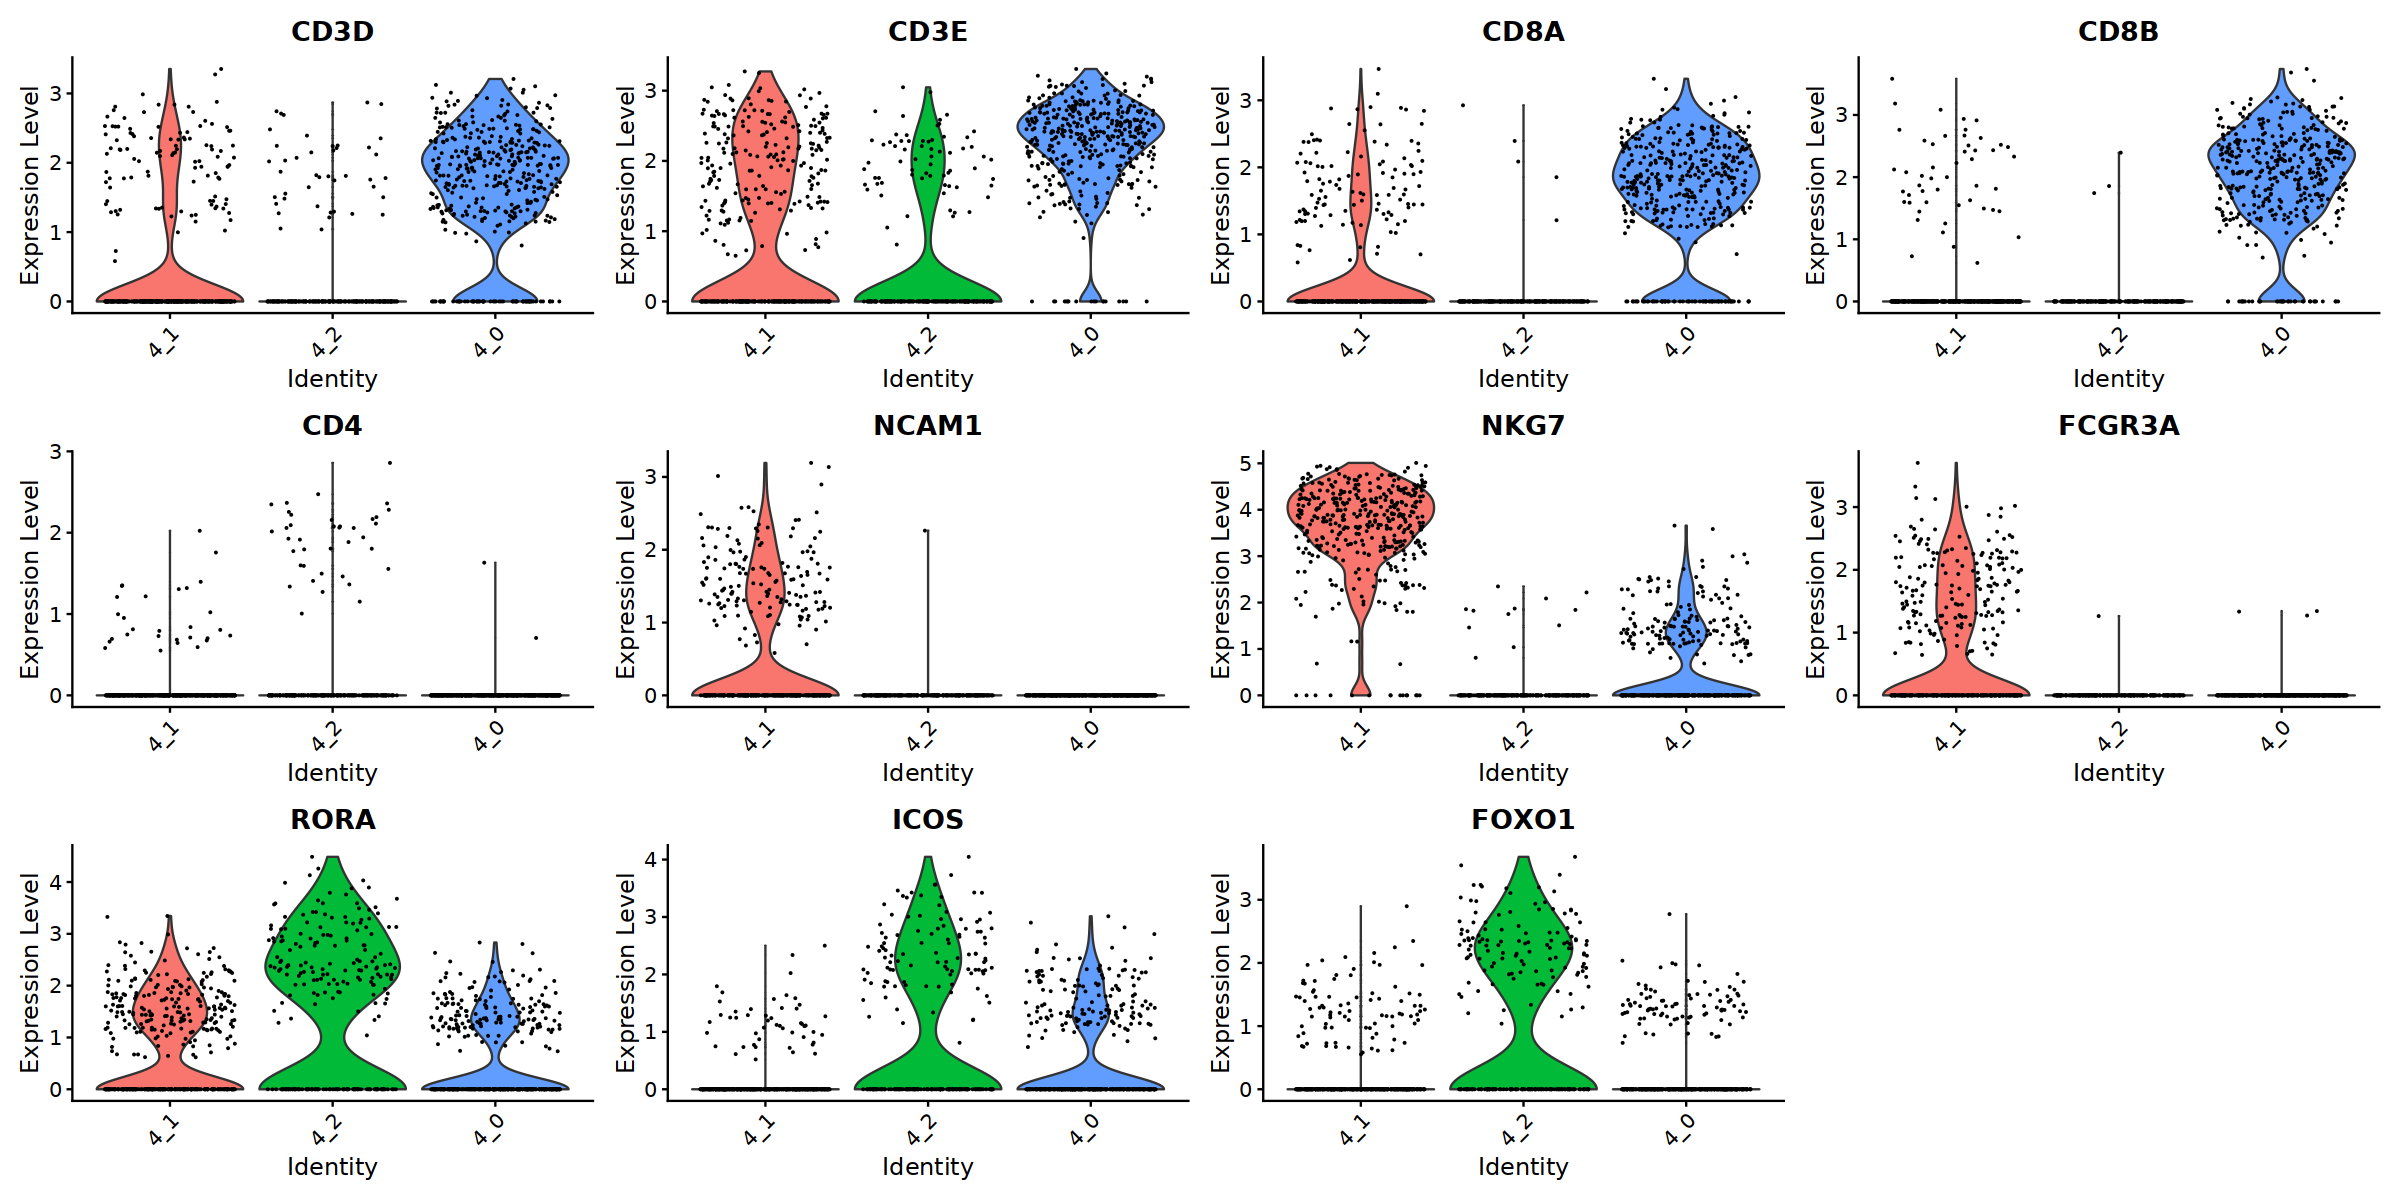

In [25]:
options(repr.plot.width = 20, repr.plot.height = 10, warn=-1,verbose = FALSE)
VlnPlot(seurat_obj, idents = c("4_0", "4_1", "4_2"),
            feature=c("CD3D","CD3E","CD8A","CD8B",
                      "CD4","NCAM1","NKG7", "FCGR3A",
                      "RORA", "ICOS","FOXO1"), ncol=4)

Platelets

In [26]:
c <- 9
rna.markers %>% 
  dplyr::filter(cluster == c) %>% 
  dplyr::filter(p_val_adj < 0.05) %>% 
  arrange(desc(avg_log2FC)) %>% head()

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene  
1  3.325392e-91 6.067229   0.992 0.316  9.146490e-87 9       PPBP  
2 1.891948e-109 5.663158   0.992 0.204 5.203804e-105 9       TUBB1 
3 1.110444e-127 5.270995   0.992 0.134 3.054276e-123 9       GP9   
4  1.850830e-96 5.232788   0.992 0.272  5.090708e-92 9       PF4   
5 3.864085e-112 5.116183   1.000 0.214 1.062816e-107 9       GNG11 
6 5.207510e-118 5.091075   1.000 0.184 1.432326e-113 9       CAVIN2

In [27]:
c <- 8
rna.markers %>% 
  dplyr::filter(cluster == c) %>% 
  dplyr::filter(p_val_adj < 0.05) %>% 
  arrange(desc(avg_log2FC)) %>% head(n=15)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene     
1  1.120285e-224 4.121369   0.989 0.286 3.081343e-220 8       FCHSD2   
2  1.381087e-246 4.025156   0.989 0.137 3.798679e-242 8       TCF4     
3  1.011908e-276 3.826324   0.941 0.005 2.783252e-272 8       JCHAIN   
4  7.979716e-228 3.658051   0.993 0.277 2.194821e-223 8       IRF8     
5  7.956328e-223 3.627884   0.991 0.294 2.188388e-218 8       APP      
6  2.299361e-279 3.543142   0.953 0.008 6.324392e-275 8       LILRA4   
7  3.387992e-237 3.415435   0.980 0.183 9.318671e-233 8       PLD4     
8  3.331204e-267 3.378606   0.957 0.049 9.162475e-263 8       ITM2C    
9  2.418338e-234 3.344449   0.880 0.022 6.651640e-230 8       GZMB     
10 8.894261e-229 3.048462   0.971 0.189 2.446366e-224 8       CCDC50   
11 3.089563e-258 3.041798   0.921 0.027 8.497843e-254 8       SERPINF1 
12 5.486879e-228 2.921343   0.971 0.147 1.509166e-223 8       AFF3     
13 4.801062e-213 2.867515   0.767 0.001 1.320532e-208 8       LINC01478
14 2.676584e-266 2.786090   0.912 0.003 7.361945e-262 8       MZB1     
15 3.534007e-200 2.738196   0.935 0.147 9.720286e-196 8       ALOX5AP

## Renaming

In [28]:
rename_clusters= list("0"="Monocytes", 
                      "1"="Macrophage",
                      "2"="CD4 T-cells", 
                      "3"="Monocytes",
                      "4_0"="CD8 T-cells",
                      "4_1"="NK",
                      "4_2"="T-helper",
                      "5"="Dendritic cells",
                      "6"="T-cells",
                      "7"="Macrophage",
                      "8"="Mast Cells",
                      "9"="Platelets")
seurat_obj <- RenameIdents(object = seurat_obj, rename_clusters)
seurat_obj$l1_annot <- Idents(seurat_obj)

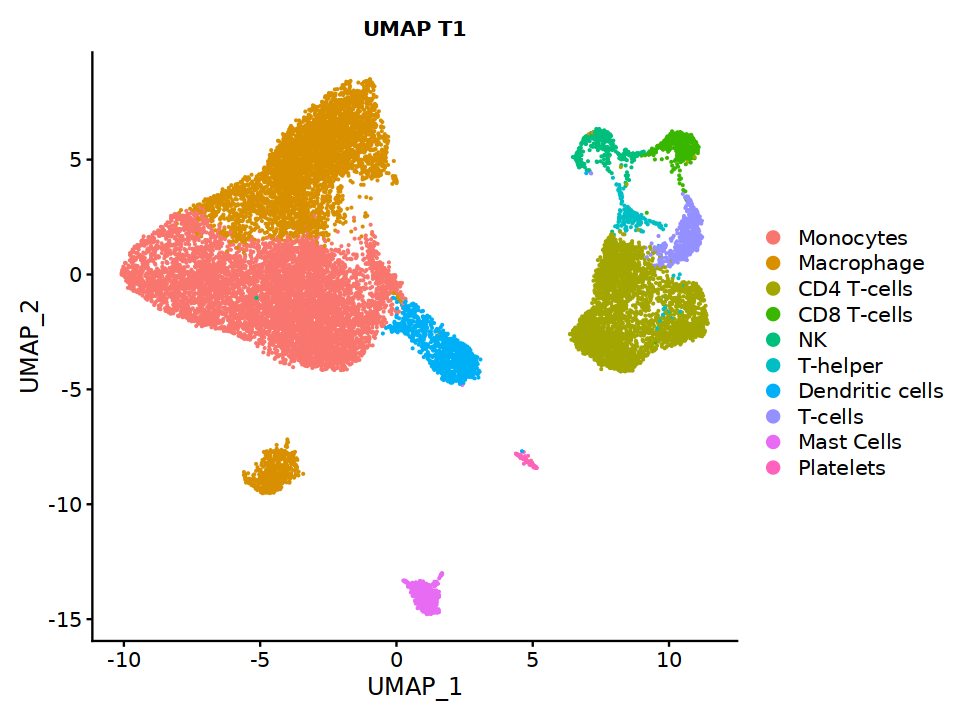

In [29]:
options(repr.plot.width = 8, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  pt.size = 0.1
) + ggtitle(glue('UMAP {timepoint}')) + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

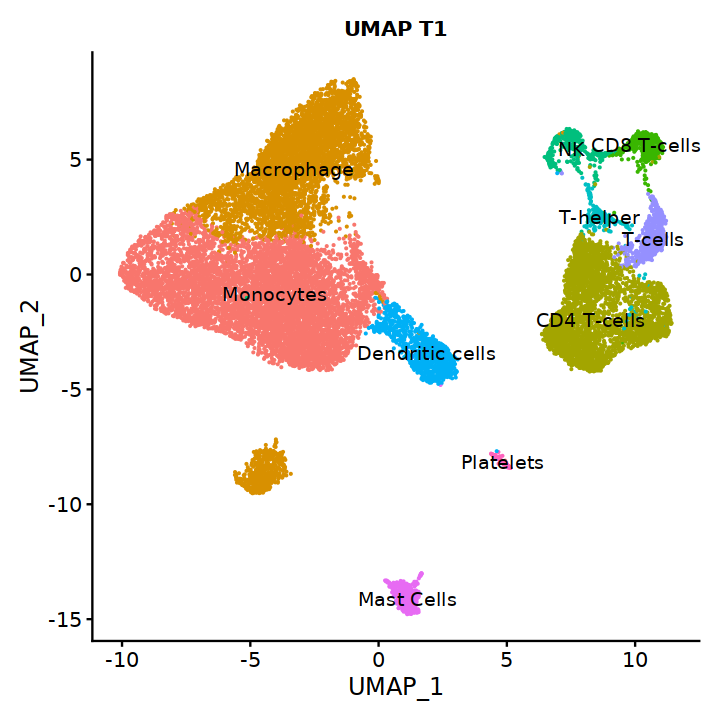

In [30]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  pt.size = 0.1,
  label = T
) + NoLegend() + ggtitle(glue('UMAP {timepoint}')) + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

## Save

In [31]:
saveRDS(seurat_obj, here::here(glue::glue("{annot}/{robj_dir}/4.0-l1_all_{timepoint}.rds")))

## Session Info

In [32]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/groups/singlecell/isentis/conda_envs/ines_r4.1.1c/lib/libopenblasp-r0.3.24.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] lubridate_1.9.3    forcats_1.0.0      stringr_1.5.0      dplyr_1.1.3       
 [5] purrr_1.0.2        readr_2.1.4        tidyr_1.3.0        tibble_3.2.1      
 [9] ggplot2_3.4.4      tidyverse_2.0.0    glue_1.6.2         here_1.0.1        
[13] SeuratObject_4.1.4 Seurat_4.0.5  